In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
new_style = {'grid': False}
plt.rc('axes', **new_style)

import pulse2percept as p2p

Call to deprecated function __init__.
Call to deprecated function mov2npy.
Call to deprecated function micron2deg. Use p2p.retina.ret2dva instead.
Call to deprecated function deg2micron. Use p2p.retina.dva2ret instead.
Call to deprecated function savemoviefiles. Use p2p.files.save_video instead.
Call to deprecated function npy2movie. Use p2p.files.save_video instead.
Call to deprecated function scale. Use p2p.stimuli.image2pulsetrain instead.
Call to deprecated function Movie2Pulsetrain. Use p2p.stimuli.video2pulsetrain instead.
Call to deprecated function retinalmovie2electrodtimeseries.


In [2]:
encoding = 'frequency'
invert = True
letter = 'C'

datafile = 'letters/%s.jpg' % letter
if invert:
    file = '%s-%s-sampling50-invert-old' % (letter, encoding)
else:
    file = '%s-%s-sampling50-old' % (letter, encoding)
stimfile = 'stim-%s.dat' % file
perceptfile = 'percept-%s.jpg' % file

In [3]:
# Place an Argus I array on the retina
argus = p2p.implants.ArgusII(x_center=-1000, y_center=0, h=50, rot=0*np.pi/180)

2017-03-23 18:00:47,847 [pulse2percept.implants] [WARNING] Distance to fovea=3610 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,848 [pulse2percept.implants] [WARNING] Distance to fovea=3126 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,850 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,851 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,852 [pulse2percept.implants] [WARNING] Distance to fovea=3373 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,853 [pulse2percept.implants] [WARNING] Distance to fovea=3453 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-03-23 18:00:47,854 [pulse2percept.implants] [WARNING] Distance to

In [4]:
sim = p2p.Simulation(argus, engine='joblib', num_jobs=10)

In [5]:
# Set parameters of the optic fiber layer (OFL)
# In previous versions of the model, this used to be called the `Retina`
# object, which created a spatial grid and generated the axtron streak map.
sampling = 50       # spatial sampling of the retina (microns)
axon_lambda = 2        # constant that determines fall-off with axonal distance
sim.set_optic_fiber_layer(sampling=sampling, axon_lambda=axon_lambda,
                          x_range=[-4000, 2000], y_range=[-2000, 2000])

In [6]:
# Set parameters of the ganglion cell layer (GCL)
# In previous versions of the model, this used to be called `TemporalModel`.
t_gcl = 0.01 / 1000   # Sampling step (s) for the GCL computation
t_percept = 0.05       # Sampling step (s) for the perceptual output
sim.set_ganglion_cell_layer(tsample=t_gcl)

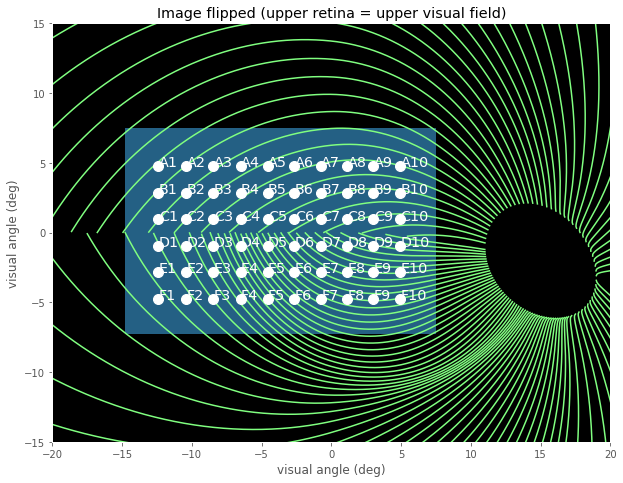

In [7]:
sim.plot_fundus()
plt.savefig('fundus.jpg')

In [8]:
import skimage.io as sio
import skimage.transform as sit

In [9]:
img_in = sio.imread(datafile, as_gray=True)
img_in = img_in[20:170, 40:200]
img_in.shape

(150, 160)

In [10]:
img_stim = sit.resize(img_in, (6, 10))
if invert:
    img_stim = 1.0 -img_stim
img_stim.shape, img_stim.dtype

((6, 10), dtype('float64'))

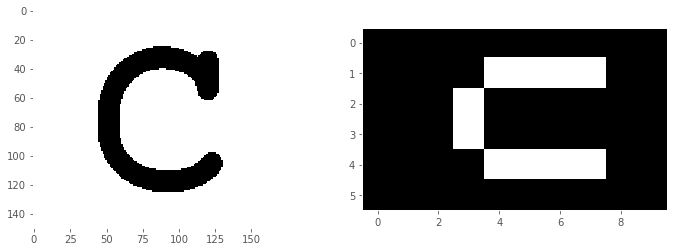

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(img_in, cmap='gray')
plt.subplot(122)
plt.imshow(img_stim, cmap='gray')

In [16]:
stim = {}
idx = 0
for row in img_stim:
    for px in row:
#         if idx % 2 == 0:
#             idx += 1
#             continue
        name = argus[idx].name
        if encoding == 'frequency':
            stim[name] = p2p.stimuli.PulseTrain(t_gcl, freq=px * 50.0, dur=0.1)
        elif encoding == 'amplitude':
            stim[name] = p2p.stimuli.PulseTrain(t_gcl, amp=px * 60.0, dur=0.1)
        else:
            raise ValueError('Unknown encoding mode ' + encoding)
        idx += 1

In [17]:
percept = sim.pulse2percept(stim, t_percept=t_percept, tol=0.25, layers=['GCL'])

2017-03-23 18:02:17,465 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-23 18:02:28,711 [pulse2percept.api] [INFO] tol=25.0%, 9319/9801 px selected
2017-03-23 18:03:20,477 [pulse2percept.api] [INFO] Done.


In [18]:
frame = p2p.get_brightest_frame(percept)

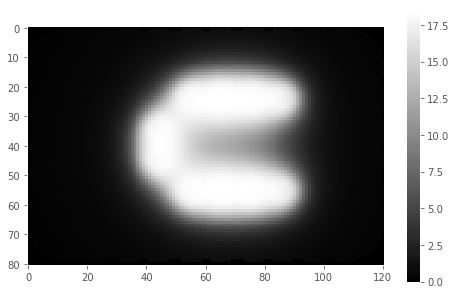

In [19]:
img = np.flipud(frame.data)
plt.figure(figsize=(8, 5))
plt.imshow(np.flipud(img), cmap='gray', vmin=0)
plt.grid('off')
plt.colorbar()

In [21]:
for i in np.ndenumerate(img_stim):
    print(i)

((0, 0), 0.0)
((0, 1), 0.0)
((0, 2), 0.0)
((0, 3), 0.0)
((0, 4), 0.0)
((0, 5), 0.0)
((0, 6), 0.0)
((0, 7), 0.0)
((0, 8), 0.0)
((0, 9), 0.0)
((1, 0), 0.0)
((1, 1), 0.0)
((1, 2), 0.0)
((1, 3), 0.0)
((1, 4), 1.0)
((1, 5), 1.0)
((1, 6), 1.0)
((1, 7), 1.0)
((1, 8), 0.0)
((1, 9), 0.0)
((2, 0), 0.0)
((2, 1), 0.0)
((2, 2), 0.0)
((2, 3), 1.0)
((2, 4), 0.0)
((2, 5), 0.0)
((2, 6), 0.0)
((2, 7), 7.1054273576010019e-15)
((2, 8), 0.0)
((2, 9), 0.0)
((3, 0), 0.0)
((3, 1), 0.0)
((3, 2), 0.0)
((3, 3), 1.0)
((3, 4), 0.0)
((3, 5), 0.0)
((3, 6), 0.0)
((3, 7), 0.0)
((3, 8), 0.0)
((3, 9), 0.0)
((4, 0), 0.0)
((4, 1), 0.0)
((4, 2), 0.0)
((4, 3), 0.0)
((4, 4), 1.0)
((4, 5), 1.0)
((4, 6), 1.0)
((4, 7), 1.0)
((4, 8), 0.0)
((4, 9), 0.0)
((5, 0), 0.0)
((5, 1), 0.0)
((5, 2), 0.0)
((5, 3), 0.0)
((5, 4), 0.0)
((5, 5), 0.0)
((5, 6), 0.0)
((5, 7), 0.0)
((5, 8), 0.0)
((5, 9), 0.0)
